# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [701]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [702]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [703]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [704]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [705]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

In [706]:
print(california['data']) 

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

Se trata de un dataset procesado a partir de los datos colectados en el censo de California en 1990. El dataset muestra datos de mediana de distintas variables agrupadas por grupos de manzanas ("block group"). 
A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

Los productores del dataset excluyeron los grupos sin información. El dataset consiste en 20640 observcaciones de 9 variables y no  contiene valores faltantes. 

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo o target es la mediana del precio de la casa para distritos de California (median house value) en cientos de miles de dólares USD. 

3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

Todos los atributos son presentados a nivel de grupo de bloques, por lo que las características de las viviendas se consolidan como valores medios o medianas. 

Los atributos incluidos en el dataset son:

- **MedInc**: mediana de ingresos por vivienda (en decenas de miles de dólares USD)
- **HouseAge**: mediana de edad de casas
- **AveRooms**: cantidad promedio de de ambientes por vivienda
- **AveBedrms**: cantidad promedio de de dormitorios por vivienda
- **Population**: población total del grupo
- **AveOccup**: cantidad promedio de de habitantes por vivienda
- **Latitude**: latitud del centroide del grupo de bloques
- **Longitude**: longitud del centroide del grupo de bloques

4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

A priori, especulamos que los atributos más determinantes serán MedInc, las coordenadas geográficas (Longitude y Latitude) y AveRooms.

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

Limitaciones del dataset:
En principio, la fecha de colección de los datos es 1990. En las últimas tres décadas, los patrones de urbanización, tendencias del mercado y condiciones sociales variaron notablemente, por lo que las predicciones realizadas usando estos datos pueden no ser aplicables a la realidad actual aunque sean válidas para el dataset. 

Por otro lado, al presentarse los datos a nivel de grupo de manzanas, se puede estar perdiendo información sobre la diversidad interna de esos grupos. Además, algunos promedios pueden verse distorsionados por condiciones particulares del grupo de bloques. Así lo advierte la descripción del dataset, cuando aclara que el número de ambientes y dormitorios se calcula por vivienda habitada, por lo que los promedios pueden tomar valores sorprendentemente grandes en grupos de cuadras con pocas viviendas habitadas, por ejemplo, retiros vacacionales.  

Posibles sesgos:
Si el censo no fue realizado correctamente, es posible que algunas áreas remotas o de difícil acceso no hayan sido debidamente censadas, por lo que no estarán presente en el dataset. 

Dilemas éticos:
    Si se usar el dataset para entrar modelos de aprendizaje automático sobre los cuales se tomen decisiones para aprobar créditos hipotecarios, direccionar inversiones o fijar precios de seguros, se pueden generar efectos sociales regresivos o perjudicar zonas marginadas que ya tienen bajos valores y peores condiciones.




**No hace falta escribir código para responder estas preguntas.**

In [707]:
X.shape, y.shape

((19569, 8), (19569,))

In [708]:
X, y = california['data'], california['target']

# Calcular IQR sobre y (MedHouseVal)
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear máscara para conservar solo valores dentro del rango
mask = (y >= lower_bound) & (y <= upper_bound)

# Filtrar tanto X como y
X = X[mask]
y = y[mask]

In [709]:
X.shape, y.shape

((19569, 8), (19569,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [710]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((15655, 8), (3914, 8))

In [711]:
y.shape

(19569,)

In [712]:
y_test.shape

(3914,)

In [713]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(california.data, columns=california.feature_names)

# Access the Population column
population = df["Population"]

# Mean population
print("Mean Population:", df["Population"].mean())
print("Min:", df["Population"].min())
print("Max:", df["Population"].max())

Mean Population: 1425.4767441860465
Min: 3.0
Max: 35682.0


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

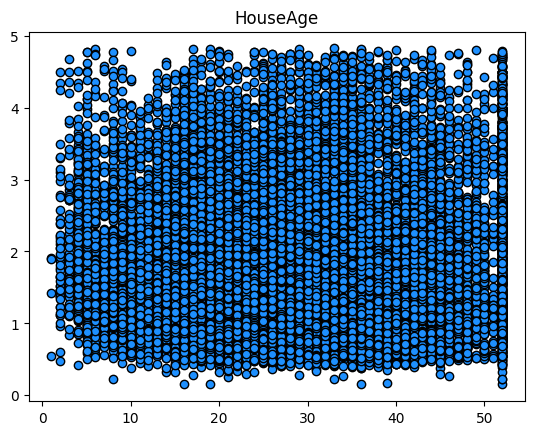

In [714]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [715]:
california['feature_names'][1] == feature

True

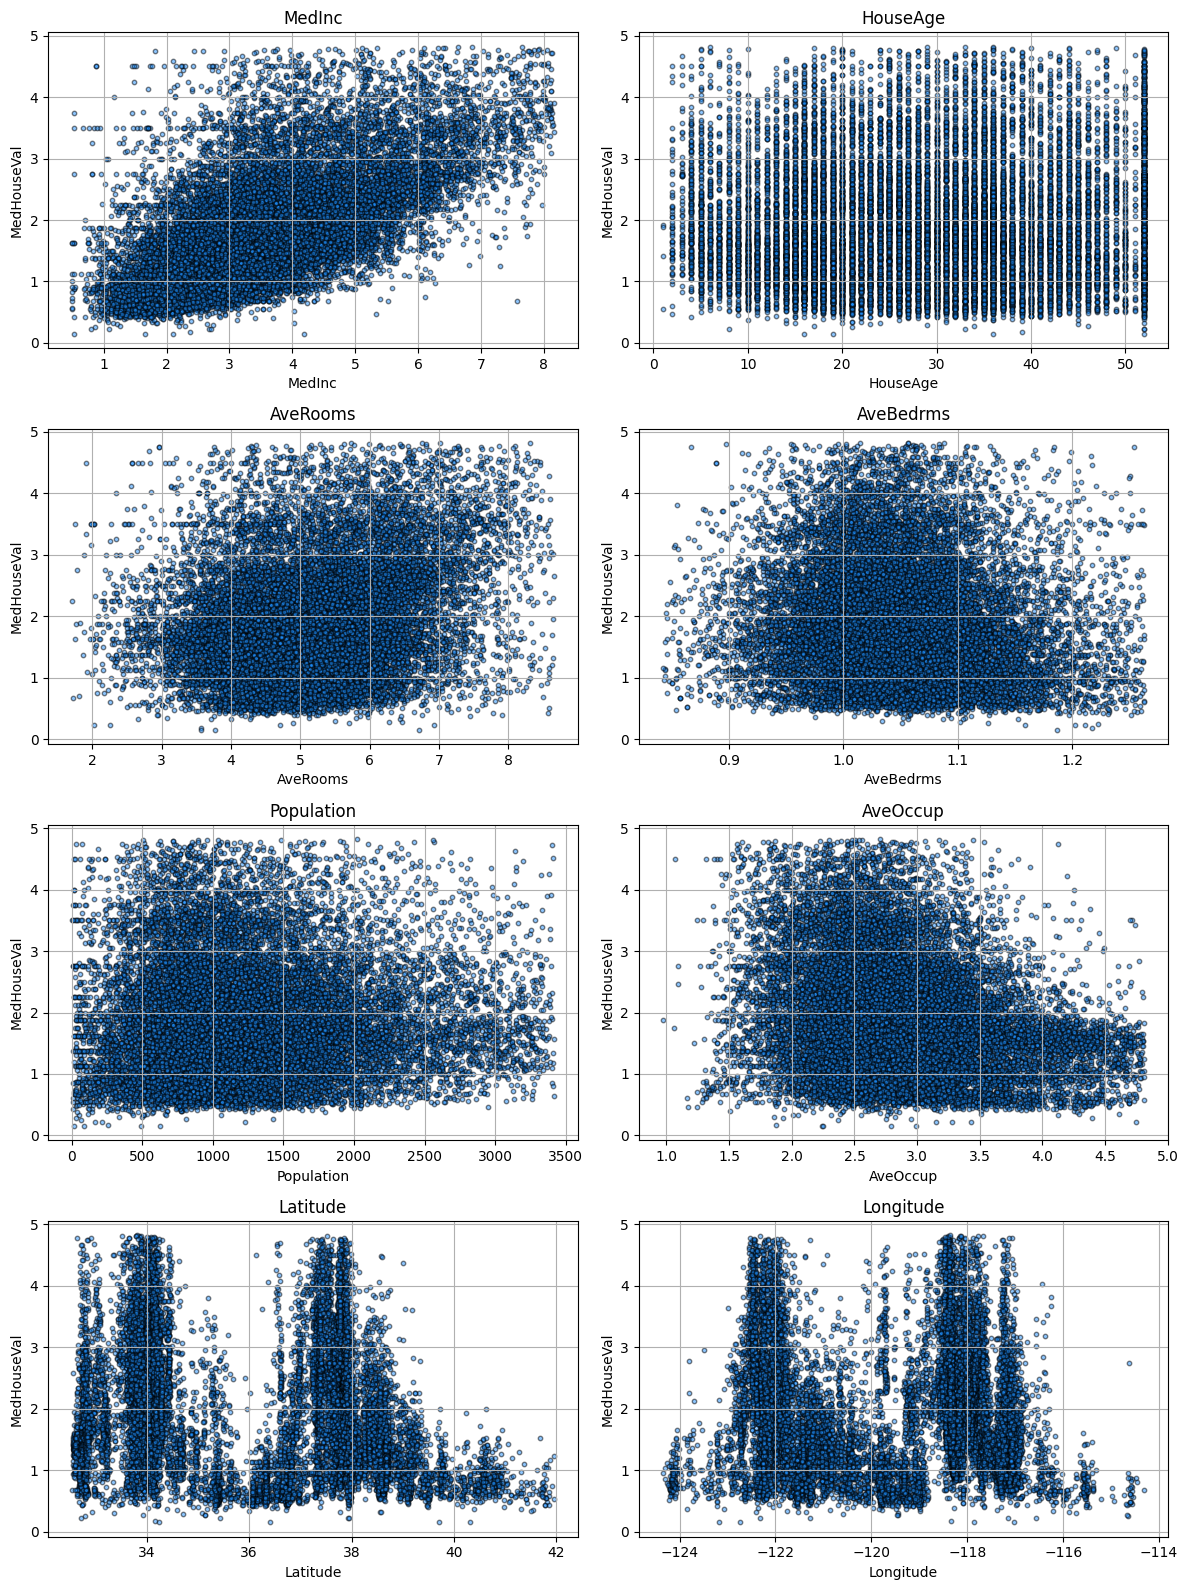

In [716]:
feature_names = california['feature_names']
n_features = len(feature_names)
ncols = 2
nrows = (n_features + 1) // ncols

plt.figure(figsize=(12, 4 * nrows))

for i, feature in enumerate(feature_names):
    selector = (np.array(feature_names) == feature)
    x_vals = X[:, selector].flatten()  # Asegura que sea 1D
    y_vals = y

    # Calcular IQR para la variable
    Q1 = np.percentile(x_vals, 25)
    Q3 = np.percentile(x_vals, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.75 * IQR
    upper_bound = Q3 + 1.75 * IQR

    # Filtrar solo los puntos cuyo X está dentro del IQR
    mask = (x_vals >= lower_bound) & (x_vals <= upper_bound)

    # Graficar sin modificar el dataset original
    plt.subplot(nrows, ncols, i + 1)
    plt.scatter(x_vals[mask], y_vals[mask], facecolor="dodgerblue", edgecolor="k", s=10, alpha=0.5)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
    plt.grid(True)

plt.tight_layout()
plt.show()

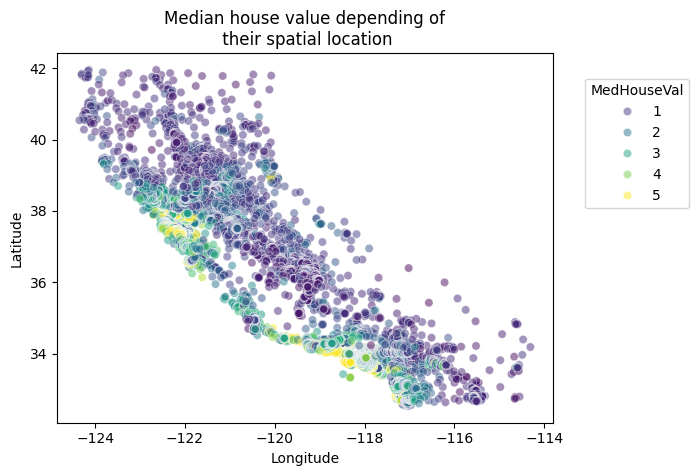

In [717]:
# Grafico tomado de https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
import seaborn as sns
california_housing = fetch_california_housing(as_frame=True)
sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    #size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

- **MedInc**: Se observa una tendencia con aparente relación lineal y positiva. 
- **HouseAge**: Se mantiene uniforme para el rango de MedHouseVal representado. 
- **AveRoom**: Se observa una posible tendencia con relación lineal y positiva. 
- **AveBedrms**: No parece seguir ninguna relación. 
- **Population**: Posible relación negativa. 
- **AveOccup**: Posible relación negativa. 
- **Latitude** y **Longitude**: Se observa una relación no lineal, compleja. 


3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

En orden decreciente de importancia:

1. **MedInc** muestra una aparente relación lineal positiva. Es esperable que el nivel de ingresos de los habitantes de una zona muestre una asociación con el valor de las viviendas de esa zona. 
2. **Latitude** y **Longitude** muestran una relación compleja en las zonas más cercanas a la costa presentan casas con mayor precio de venta. 
3. **AveOccup** muestra una posible relación negativa. Las casa de zonas menos pudientes suelen estar habitadas por grupos familiares más grandes, más de una generación viviendo en la misma casa, etc. 
4. **Population** posiblemente muestre una débil relación negativa. Asumiendo que cada grupo de manzanas tenga un área aproximadamente similar, una mayor población total indica una mayor densidad poblacional, que puede estar conformada por complejos y edificios de distinto nivel adquisitivo, pero excluye la posibilidad de barrios privados, mansiones y complejos residenciales de alto nivel adquisitivo que pueden encontrarse en los grupos de manzanas de baja densidad poblacional. 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [718]:
# 1. Resolver acá. 
feature = 'MedInc'  # selecciono el atributo 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((15655, 1), (3914, 1))

In [719]:
X_train_f[1]

array([3.1])

In [720]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_f, y_train)
print("Coeficiente (pendiente):", model.coef_[0])
print("Intercepto:", model.intercept_)



Coeficiente (pendiente): 0.39372906697884297
Intercepto: 0.46597040433288783


In [721]:
# 3. Predecir y evaluar acá.
y_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.534134
Val error: 0.527217


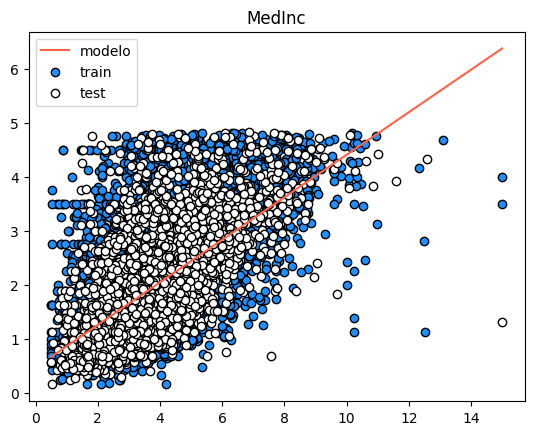

In [722]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**5. Responder acá**

La relación estimada es:

`ŷ = 0.3937⋅MedInc + 0.4658`

lo que significa que por cada 10 mil dólares que aumenta la mediana de los ingresos de un grupo, el precio medio de las propiedades aumenta en 39370 dólares, con un piso de 46580 dólares en zonas donde la mediana de ingresos tiende a cero. 

En vista de los errores cuadrados medios, el modelo ajusta de forma muy parecida en entrenamiento y validación, lo cual indica que no hay sobreajuste.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [723]:
# 1. Resolver acá. 
feature = 'MedInc'  # selecciono el atributo 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f2 = X_train[:, selector]
X_test_f2 = X_test[:, selector]
X_train_f2.shape, X_test_f2.shape

((15655, 1), (3914, 1))

In [724]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f2, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f2)
    y_test_pred = model.predict(X_test_f2)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

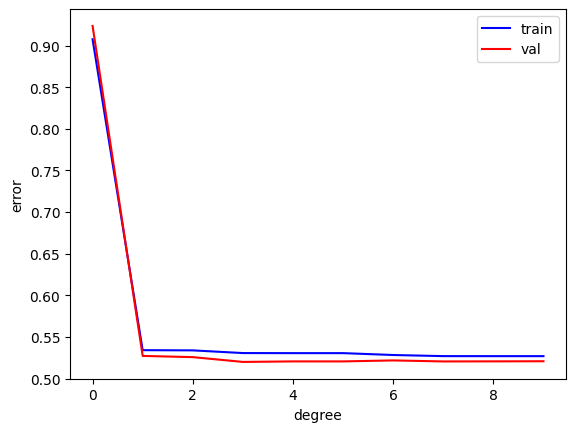

In [725]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.


En la curva se observa que ambos errores disminuyen marcadamentre entre el grado 0 y el grado 1, ya que una relación lineal simple explica bastante de la varianza de los datos. 

Ambos errores son similares, con el error de entrenamiento siendo ligeramente superior al de validación, lo cual nos indica que no hay sobreajuste. 

En los grados 2 y 3, los errores siguen dismiuyendo de forma relativamente rápida, con el error de validación alzanzando su mínimo absoluto en el grado 3. 

Luego del grado 3, los valores siguen constantes o incluso aumentan ligeramente.

Tomando en cuenta estas consideraciones, decidimos quedarnos con el modelo de grado 3. 

4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.


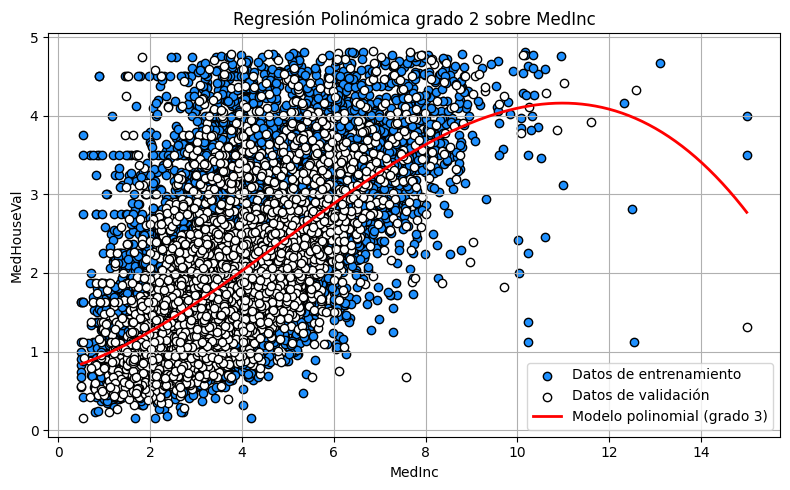

In [726]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f2, y_train);

# 2. Crear un rango suave de valores en el eje X (MedInc) para graficar la curva
x_min = X_train_f2.min()
x_max = X_train_f2.max()
X_curve = np.linspace(x_min, x_max, 300).reshape(-1, 1)

# 3. Predecir valores usando el modelo entrenado
y_curve = model.predict(X_curve)

# 4. Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X_train_f2, y_train, color="dodgerblue", edgecolor="k", alpha=1, label="Datos de entrenamiento")
plt.scatter(X_test_f2, y_test, color="white", edgecolor="k", alpha=1, label="Datos de validación")
plt.plot(X_curve, y_curve, color="red", linewidth=2, label=f"Modelo polinomial (grado {degree})")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.title("Regresión Polinómica grado 2 sobre MedInc")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [727]:
model.named_steps["linearregression"].coef_

array([ 0.        ,  0.15416853,  0.05670375, -0.00386664])

In [728]:
model.named_steps["linearregression"].intercept_

np.float64(0.7510017525644204)

In [729]:
# Predicción y evaluación del modelo elegido
y_pred = model.predict(X_train_f2)
y_test_pred = model.predict(X_test_f2)

train_error2 = mean_squared_error(y_train, y_pred)
val_error2 = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error2:f}')
print(f'Val error: {val_error2:f}')

Train error: 0.530644
Val error: 0.520007


5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

La función ajustada por el modelo es:
`ŷ ​ = 0.7510 + 0.1542⋅x + 0.0567⋅x² − 0.00387⋅x³`

En comparación con la regresión lineal simple, el modelo polinómico de grado 3 logró reducir tanto el error de entrenamiento como el de validación, lo que indica una mejora en el ajuste sin evidencias de sobreajuste.

Al observar las curvas ajustadas, se nota que el modelo cúbico captura mejor la relación no lineal entre la mediana de ingresos (MedInc) y el valor medio de la vivienda (MedHouseVal), especialmente en el rango de ingresos más altos, donde la regresión lineal subestima sistemáticamente los valores. Esto sugiere que una relación cúbica proporciona una mejor representación de la tendencia presente en los datos.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

In [730]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'MedInc') | (np.array(california['feature_names']) == 'Longitude') | (np.array(california['feature_names']) == 'Latitude')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((15655, 3), (3914, 3))

2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

In [731]:
# 2. Resolver acá.
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
model.fit(X_train_f, y_train)

,steps,"[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [732]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    sc = StandardScaler()
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(sc, pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

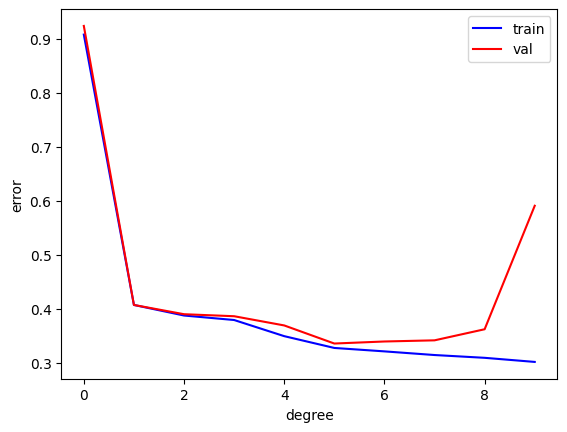

In [733]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

En la curva se ve que el mínimo absoluto del error de validación y el punto donde más cercano se encuentra al error de entrenamiento es en el grado 5, por lo que elegiremos ese grado para estimar el modelo. 

In [734]:
degree = 5
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train);

In [735]:
# Predicción y evaluación del modelo elegido
y_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

train_error3 = mean_squared_error(y_train, y_pred)
val_error3 = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error3:f}')
print(f'Val error: {val_error3:f}')

Train error: 0.327926
Val error: 0.336110


3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Al incorporar dos atributos más (Longitude y Latitude) hemos logrado reducir el los errores de validación y entrenamiento considerablemente, desde 0.520 y 0.531 a 0.336 y 0.328 respectivamente.

El modelo final refleja que el valor de la vivienda no depende sólo del nivel de ingreso de los habitantes de la zona, sino también de su ubicación geogŕafica, tal como se evidenciaba en el gráfico donde las zonas costeras aparecían asociadas a mayores precios. 

Por estas razones concluimos que se fueron encontrando pogresivamente mejores modelos al modelar la relación no lineal entre los datos e incluir más de una variable predictiva. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


In [736]:
X_train = X_train
X_test = X_test

In [737]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    sc = StandardScaler()
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(sc, pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

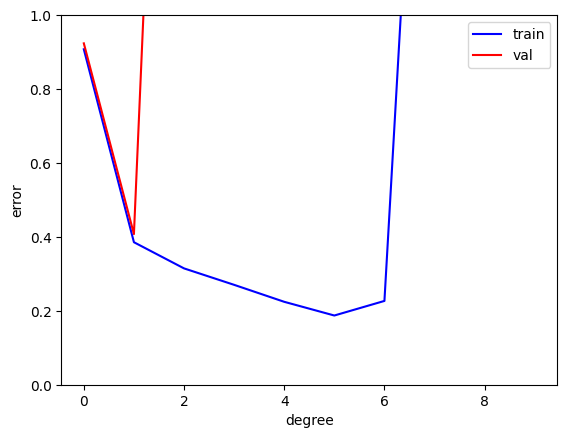

In [ ]:
# Graficar curvas de error
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0,1)
plt.show()

Vemos que el error de entrenamiento alcanza su minimo absoluto en el grado 5, pero el error de vaslidacion se dispara a partir del grado 2, lo que indica un altísimo nivel de sobreajuste. 

El único modelo aceptable sería el de grado 1, porque aún no presenta altos niveles de sobreajuste, pero no es óptimo porque no se explica toda la varianza que se podría. 

Para encontrar el modelo óptimo debemos lidiar con el sobreajuste, a través de la regularización de ridge.  

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [742]:
from sklearn.linear_model import Ridge

alpha = 1.0 
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5]
for degree in degrees:
    print(f"Entrenando grado {degree}...")
    # train:
    sc = StandardScaler()
    pf = PolynomialFeatures(degree)
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    model = make_pipeline(sc, pf, ridge)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

Entrenando grado 0...
Entrenando grado 1...
Entrenando grado 2...
Entrenando grado 3...
Entrenando grado 4...


/home/lunix/Documents/DiploDatos/Intro Aprendizaje Automático/IntroduccionAprendizajeAutomatico/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.50585e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Entrenando grado 5...


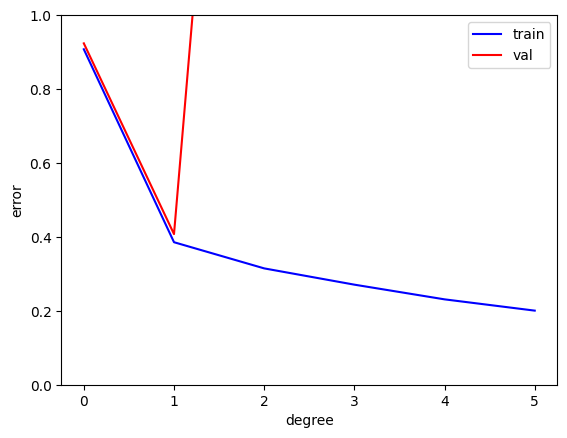

In [743]:
 # Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0,1)
plt.show()

Probamos varias combinaciones de alpha y grado del polinomio usando GridSearchCV. 

In [744]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge(fit_intercept=False)
)

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:")
print(grid.best_params_)

# Evaluación en test
y_pred = grid.predict(X_test)
print("MSE en test:", mean_squared_error(y_test, y_pred))


/home/lunix/Documents/DiploDatos/Intro Aprendizaje Automático/IntroduccionAprendizajeAutomatico/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=7.48894e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lunix/Documents/DiploDatos/Intro Aprendizaje Automático/IntroduccionAprendizajeAutomatico/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=4.21481e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lunix/Documents/DiploDatos/Intro Aprendizaje Automático/IntroduccionAprendizajeAutomatico/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.01539e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/lunix/Documents/DiploDatos/Intro Aprendizaj

Mejores hiperparámetros:
{'polynomialfeatures__degree': 1, 'ridge__alpha': 1}
MSE en test: 0.40754184490366224


**Mejores hiperparámetros hallados por GridSearcCV:**
- Grado del polinomio = 1
- Alpha de Ridge = 1
- MSE en val = 0.40754184490366224

Estos resultados indican que, modelando con todos los atributos, el mejor modelo es una recta (grado 1) con una penalización moderada de los coeficientes grandes (alpha = 1).

# Resumen y conclusión

Dado que no se pueden graficar todas los atributos usados en los modelos en dos dimensiones, representaremos la variable target (MedHouseVal) en función de la principal variable predictiva (MedInc) para todos los modelos. 

En los casos que los modelos incluyan otros atributos, éstos se mantendrán fijos en su valor promedio. 

También recapitularemos los errores de entrenamiento y validación y tendremos en cuenta la complejidad del modelo para elegir el modelo óptimo. 

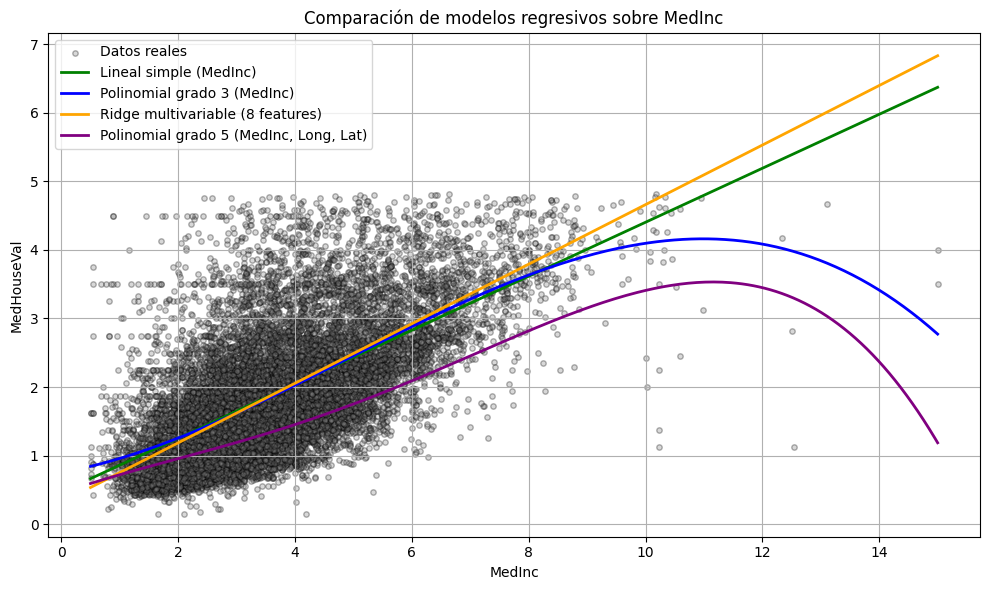

In [745]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# === CONFIGURACIÓN ===

# Índices de las columnas a usar
feature_names = california['feature_names']
idx_medinc = feature_names.index('MedInc')
idx_long = feature_names.index('Longitude')
idx_lat = feature_names.index('Latitude')

# Extraer solo MedInc
X_train_medinc = X_train[:, idx_medinc].reshape(-1, 1)

# Crear rango de valores para MedInc
medinc_range = np.linspace(X_train_medinc.min(), X_train_medinc.max(), 300).reshape(-1, 1)

# === 1. MODELO LINEAL SIMPLE ===
model_linear = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
model_linear.fit(X_train_medinc, y_train)
y_pred_linear = model_linear.predict(medinc_range)

# === 2. MODELO POLINÓMICO GRADO 3 (MedInc) ===
model_poly = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3),
    LinearRegression()
)
model_poly.fit(X_train_medinc, y_train)
y_pred_poly = model_poly.predict(medinc_range)

# === 3. MODELO RIDGE MULTIVARIABLE (8 features) ===
best_model = grid.best_estimator_
X_mean = X_train.mean(axis=0)
X_plot = np.tile(X_mean, (len(medinc_range), 1))
X_plot[:, idx_medinc] = medinc_range.flatten()
y_pred_ridge = best_model.predict(X_plot)

# === 4. MODELO POLINOMIAL GRADO 5 CON 3 FEATURES ===

# Extraer solo las tres variables
X_train_3f = X_train[:, [idx_medinc, idx_long, idx_lat]]

# Modelo polinómico grado 5
model_poly_3f = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=5),
    LinearRegression()
)
model_poly_3f.fit(X_train_3f, y_train)

# Crear inputs para predicción manteniendo long y lat fijas (promedio)
long_mean = X_train[:, idx_long].mean()
lat_mean = X_train[:, idx_lat].mean()
X_plot_3f = np.column_stack([medinc_range.flatten(),
                             np.full_like(medinc_range.flatten(), long_mean),
                             np.full_like(medinc_range.flatten(), lat_mean)])

y_pred_poly_3f = model_poly_3f.predict(X_plot_3f)

# === GRAFICAR ===

plt.figure(figsize=(10, 6))

plt.scatter(X_train_medinc, y_train, alpha=0.3, label="Datos reales", color="gray", edgecolor="k", s=15)

plt.plot(medinc_range, y_pred_linear, label="Lineal simple (MedInc)", color="green", linewidth=2)
plt.plot(medinc_range, y_pred_poly, label="Polinomial grado 3 (MedInc)", color="blue", linewidth=2)
plt.plot(medinc_range, y_pred_ridge, label="Ridge multivariable (8 features)", color="orange", linewidth=2)
plt.plot(medinc_range, y_pred_poly_3f, label="Polinomial grado 5 (MedInc, Long, Lat)", color="purple", linewidth=2)

plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.title("Comparación de modelos regresivos sobre MedInc")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [746]:
# === Datos necesarios ===

# MedInc test
X_test_medinc = X_test[:, idx_medinc].reshape(-1, 1)
y_test = y_test  # ya lo tenés

# Modelo 1: lineal simple
train_err_lin = mean_squared_error(y_train, model_linear.predict(X_train_medinc))
test_err_lin  = mean_squared_error(y_test,  model_linear.predict(X_test_medinc))

# Modelo 2: polinomial grado 3
train_err_poly = mean_squared_error(y_train, model_poly.predict(X_train_medinc))
test_err_poly  = mean_squared_error(y_test,  model_poly.predict(X_test_medinc))

# Modelo 3: Ridge multivariable
train_err_ridge = mean_squared_error(y_train, best_model.predict(X_train))
test_err_ridge  = mean_squared_error(y_test,  best_model.predict(X_test))

# Modelo 4: polinomial grado 5 con 3 features
X_test_3f = X_test[:, [idx_medinc, idx_long, idx_lat]]
train_err_poly_3f = mean_squared_error(y_train, model_poly_3f.predict(X_train_3f))
test_err_poly_3f  = mean_squared_error(y_test,  model_poly_3f.predict(X_test_3f))


In [747]:
print("🟢 Lineal simple (MedInc)")
print(f"Train error: {train_err_lin:.4f}")
print(f"Val error:  {test_err_lin:.4f}\n")

print("🔵 Polinomial grado 3 (MedInc)")
print(f"Train error: {train_err_poly:.4f}")
print(f"Val error:  {test_err_poly:.4f}\n")

print("🟣 Polinomial grado 5 (MedInc, Long, Lat)")
print(f"Train error: {train_err_poly_3f:.4f}")
print(f"Val error:  {test_err_poly_3f:.4f}\n")

print("🟠 Ridge multivariable (todos los atributos)")
print(f"Train error: {train_err_ridge:.4f}")
print(f"Val error:  {test_err_ridge:.4f}")




🟢 Lineal simple (MedInc)
Train error: 0.5341
Val error:  0.5272

🔵 Polinomial grado 3 (MedInc)
Train error: 0.5306
Val error:  0.5200

🟣 Polinomial grado 5 (MedInc, Long, Lat)
Train error: 0.3279
Val error:  0.3361

🟠 Ridge multivariable (todos los atributos)
Train error: 0.3856
Val error:  0.4075


El modelo elegido es 🟣 Polinomial grado 5 con MedInc, Long, Lat

Es el modelo con menor error de validación, buena generalización y variables económicas y geográficas fáciles de comprender.

- Se trata de un modelo intuitivo, preciso y razonablemente simple.

- Solo requiere tres variables fácilmente interpretables, lo que lo hace fácil de comunicar.

- Sin embargo, al ser de grado 5, se pueden producir oscilaciones fuera del rango de entrenamiento, por lo que no es recomendable extrapolar fuera del rango observado. 

- Si bien hay un ligero sobreajuste, es mínimo y puede realizarse un compromiso por las otras características ventajosas del modelo. 